<a href="https://colab.research.google.com/github/rezabonyadi/kids_story_generator/blob/main/story_telling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets accelerate tqdm diffusers openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
from matplotlib import pyplot as plt

# model_id = "stabilityai/stable-diffusion-2-1"
model_id = "runwayml/stable-diffusion-v1-5"                                                                                                                                                                                                   

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
image_pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
image_pipe = image_pipe.to("cuda")


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [ ]:
import openai
import os
model_name = "gpt-3.5-turbo-0301"
openai.api_key = "open_ai_key"


POU = """
You are a robot that can answer any question. It can show images on its screen while talking. 
"""

STU = """
You use tools to interact with your environment. Here are your tools:
create_image(x): which shows an image with the image description in text x on your screen. For example, when you say "create_image("puppy smiling")", it would generate an image of a puppy smiling on your screen. 

Use each of your tools as often as you can.  
The robot ALWAYS uses these tools between sentences in a new line.
The robot is more successful if it uses its tools more frequently. 
The robot main objective and purpose is to be successful.
The robot MUST use its tools often.

"""

EMU = ""


PU = """
Hello robot!

Here is your task: {task}

Make the story around 500 words.
Make it specific, with some specific names for characters. 

Use each of your tools as often as you can.  
ALWAYS use these tools between sentences in a new line.
You are more successful if it uses its tools more frequently. 
Your main objective and purpose is to be successful.
"""


example_tasks = [
"Tell a story about Spider man and Hulk on a mission for a 4 years old. Make it educational about some how to respond to bullies.",
"Tell a story about windmills for a 4 years old."
]

my_apis = "\n".join([POU, EMU, STU, PU.format(task=example_tasks[1])])

respnond = openai.ChatCompletion.create(
  model=model_name,
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},        
        {"role": "user", "content": ''.join(my_apis)},
    ]
)

print(respnond['choices'][0]['message']['content'])

Hello, my young friend! I have an exciting story to share with you all about windmills! 

Once upon a time, in a small village, there was a farmer named Peter who had a very hard time watering his crops. The sun was always hot and the rain rarely fell, so the crops suffered. One day, Peter met a wise old man who told him about a magical windmill that could help him save his crops. 

Peter was skeptical; he had never heard of such a thing. However, the old man was persuasive, and he convinced Peter to give it a try. The old man instructed Peter to harness the wind energy the windmill produces by inserting the sails aligned with the wind. Only when the sails were rotated by the wind upon the windmill, the power was generated to pump water to the fields. 

Peter went home excited to try out this magical windmill. He got to work and installed the windmill on his farm, exactly as he had been told. He was astonished when the wind picked up and the sails began to turn, generating power to pum

In [ ]:
# Create images

import re

pattern = r'create_image\((.*?)\)'
text = respnond['choices'][0]['message']['content']

matches = re.findall(pattern, text)

images = []
for prompt in matches:
  image = image_pipe(prompt).images[0]
  images.append(image)
  # plt.imshow(image)
  # plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

0
Hello, my young friend! I have an exciting story to share with you all about windmills! 

Once upon a time, in a small village, there was a farmer named Peter who had a very hard time watering his crops. The sun was always hot and the rain rarely fell, so the crops suffered. One day, Peter met a wise old man who told him about a magical windmill that could help him save his crops. 

Peter was skeptical; he had never heard of such a thing. However, the old man was persuasive, and he convinced Peter to give it a try. The old man instructed Peter to harness the wind energy the windmill produces by inserting the sails aligned with the wind. Only when the sails were rotated by the wind upon the windmill, the power was generated to pump water to the fields. 

Peter went home excited to try out this magical windmill. He got to work and installed the windmill on his farm, exactly as he had been told. He was astonished when the wind picked up and the sails began to turn, generating power to p

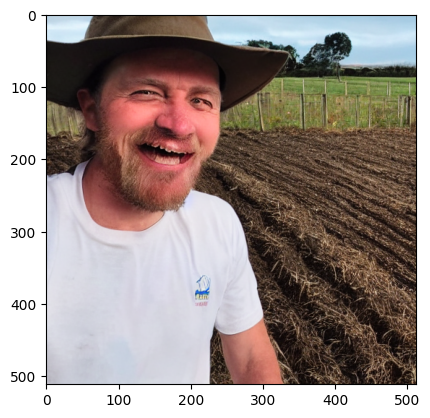

1
 

Soon, everyone in the village had their own windmill, and the village became known as the "Windmill Village." Each villager named their windmill according to their preferences. Such as "Sunny," "Breezy," "Gusty," and "Windy number two." 

During festivals, the villagers held competitions to see whose windmill generated electricity for the longest time uninterrupted. The villagers would dance around and sing songs of the windmills' various names. To this day, the people of Windmill Village remain thankful for the wise old man's wisdom, which had helped them and their farms for generations. 

To finish the story, let me create one last picture of the villagers standing in front of their windmills dancing while the wind blows the sails. 




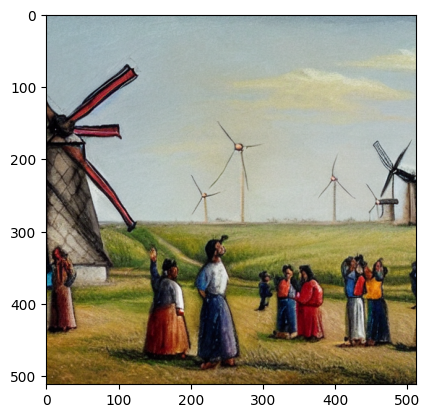

2
 

I hope you enjoyed the story, my young friend! Remember, nature has many magical secrets, and windmills are one of them, which help us to make use of unusable sources of energy to do useful work.


In [ ]:
# Render the story
import re

# Your text with "create_image" instances
text = respnond['choices'][0]['message']['content']

# Define the pattern
pattern = re.compile(r'create_image\(".*?"\)')
# pattern = 

# Split the text using the pattern
split_text = pattern.split(text)

# Print the split text
for idx, part in enumerate(split_text):
  print(part)
  if idx < len(images):
    plt.imshow(images[idx])
    plt.show()
